In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import collections
from itertools import combinations
from datetime import date

In [2]:
data = pd.read_csv('movie_bd_v5.csv')
data.sample(5)

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year
190,tt2177771,70000000,154984035,The Monuments Men,Matt Damon|Cate Blanchett|George Clooney|Bill ...,George Clooney,It was the greatest art heist in history,Based on the true story of the greatest treasu...,118,War|Drama|History|Action,Columbia Pictures|Studio Babelsberg|Fox 2000 P...,1/24/2014,5.7,2014
1883,tt0122459,24000000,36609995,Return to Me,David Duchovny|Minnie Driver|Carroll O'Connor|...,Bonnie Hunt,A comedy straight from the heart,It took a lot of cajoling to get Bob (Duchovny...,115,Romance|Comedy|Drama,Metro-Goldwyn-Mayer (MGM)|JLT Productions,4/7/2000,5.5,2000
1233,tt1351685,195000000,197687603,Jack the Giant Slayer,Nicholas Hoult|Eleanor Tomlinson|Ewan McGregor...,Bryan Singer,Prepare for a giant adventure,The story of an ancient war that is reignited ...,114,Action|Family|Fantasy,New Line Cinema|Original Film|Legendary Pictur...,2/27/2013,5.5,2013
1156,tt0299930,54000000,7266209,Gigli,Ben Affleck|Jennifer Lopez|Justin Bartha|Laini...,Martin Brest,Life doesn't play by the rules.,Gigli is ordered to kidnap the psychologically...,121,Drama,City Light Films|Revolution Studios|Casey Silv...,8/1/2003,3.8,2003
1393,tt0391304,30000000,42886719,A Lot Like Love,Ashton Kutcher|Amanda Peet|Aimee Garcia|Taryn ...,Nigel Cole,There's nothing better than a great romance......,"On a flight from Los Angeles to New York, Oliv...",107,Comedy,Mile High Productions|Kevin Messick Production...,4/22/2005,6.5,2005


# Предобработка

In [3]:
answers = {} # создадим словарь для ответов

# Добавляем колонку прибыль = сборы - бюджет (profit = revenue - budget).
data['profit'] = data.apply(lambda row: row['revenue']-row['budget'], axis = 1)

# Добавляем колонку release_month, которая показывает месяц релиза фильма. Вытягиваем из release_date.
data['release_month'] = data.release_date.apply(lambda item: item.split("/")[0])

# Добавляем колонку original_title_len, которая показывает количестыо символов в названии фильма (original_title).
data['original_title_len'] = data.original_title.apply(lambda item: len(item))

# Добавляем колонку overview_words_len, которая показывает количестыо слов в описании фильма (overview).
data['overview_words_len'] = data.overview.apply(lambda item: len(item.split()))

# Преобразовываем формат колонки из object в datetime64
data['release_date'] = pd.to_datetime(data['release_date'])


def data_explode(df, col, cnt = False):
    """
    Принимает на входе объект DataFrame df и 'имя' столбца col.
    Каждое поле столбца col - список элементов с разделителем '|'.
    Если cnt = True ("режим value_counts"):
        - возвращает объект series типа value_counts для столбца col.
    Если cnt = False ("режим DataFrame"):
        - возвращает объект DataFrame c "разъединёнными" элементами столбца col
    """
    df[col] = df[col].str.split('|')
    df = df.explode(col)
    if cnt: 
        return df[col].value_counts()
    return df

# 1. У какого фильма из списка самый большой бюджет?

ВАРИАНТ 1

In [4]:
# Фильтруем DataFrame по бюджету, где бюджет равен максимальному значению бюджета. Выводим название фильма.
data[data.budget == data.budget.max()]['original_title']

723    Pirates of the Caribbean: On Stranger Tides
Name: original_title, dtype: object

ВАРИАНТ 2

In [5]:
# Сортируем DataFrame по колонку бюджета по убыванию, inplace = False (сортировку не применякем к DF)
# Выводим название фильма строки с 0-ым индексов в отсортированном DataFrame
data.sort_values(by = 'budget', ascending=False, inplace=False).iloc[0]['original_title']

'Pirates of the Caribbean: On Stranger Tides'

In [6]:
answers['1'] = 'Pirates of the Caribbean: On Stranger Tides' #+

# 2. Какой из фильмов самый длительный (в минутах)?

In [7]:
# Фильтруем DataFrame по значению длительности, где длительность равна максимальному значению. Выводим название фильма.
data[data.runtime == data.runtime.max()]['original_title']

1157    Gods and Generals
Name: original_title, dtype: object

In [8]:
answers['2'] = 'Gods and Generals' #+

# 3. Какой из фильмов самый короткий (в минутах)?





In [9]:
# Фильтруем DataFrame по значению длительности, где длительность равна минимальному значению. Выводим название фильма.
data[data.runtime == data.runtime.min()]['original_title']

768    Winnie the Pooh
Name: original_title, dtype: object

In [10]:
answers['3'] = 'Winnie the Pooh' #+

# 4. Какова средняя длительность фильмов?


ВАРИАНТ 1

In [11]:
# Применяем функцию нахождения среднего (mean) к столбцу runtime.
data.runtime.mean()

109.6585494970884

ВАРИАНТ 2

In [12]:
# Применяем метод describe() к DataFrame, обращаемся к значению среднего (mean) для runtime.
data.describe()['runtime']['mean']

109.6585494970884

In [13]:
answers['4'] = 110 #+

# 5. Каково медианное значение длительности фильмов? 

ВАРИАНТ 1

In [14]:
# Применяем функцию нахождения медианы (median) к столбцу runtime.
data.runtime.median()

107.0

ВАРИАНТ 2

In [15]:
# Применяем метод describe() к DataFrame, обращаемся к значению медианы (50%) для runtime.
data.describe()['runtime']['50%']

107.0

In [16]:
answers['5'] = 107 #+

# 6. Какой самый прибыльный фильм?
#### Внимание! Здесь и далее под «прибылью» или «убытками» понимается разность между сборами и бюджетом фильма. (прибыль = сборы - бюджет) в нашем датасете это будет (profit = revenue - budget) 

In [17]:
# Код получения столбца profit вынесен в Предобработку в начале.
# Фильтруем DataFrame по значению прибыли, равному максимальному. Выводим название фильма.
data[data.profit == data.profit.max()]['original_title']

239    Avatar
Name: original_title, dtype: object

In [18]:
answers['6'] = 'Avatar' #+

# 7. Какой фильм самый убыточный? 

In [19]:
# Фильтруем DataFrame по значению прибыли, равному минимальному. Выводим название фильма.
data[data.profit == data.profit.min()]['original_title']

1245    The Lone Ranger
Name: original_title, dtype: object

In [20]:
answers['7'] = 'The Lone Ranger' #+

# 8. У скольких фильмов из датасета объем сборов оказался выше бюджета?

ВАРИАНТ 1

In [21]:
# Фильтруем DataFrame по услувию "сборы больше бюджета". Находим длинну полученного DataFrame.
len(data[data.revenue > data.budget])

1478

ВАРИАНТ 2

In [22]:
# Фильтруем DataFrame по услувию "сборы больше бюджета". 
# Применяем метод nunique() для получения числа уникальных ID фильмов.
data[data.revenue > data.budget]['imdb_id'].nunique()

1478

ВАРИАНТ 3

In [23]:
# Фильтруем DataFrame по услувию "сборы больше бюджета" с помощью метода query(). Находим длинну полученного DataFrame.
len(data.query('revenue > budget'))

1478

In [24]:
answers['8'] = 1478 #+

# 9. Какой фильм оказался самым кассовым в 2008 году?

ВАРИАНТ 1

In [25]:
# Создаем DataFrame на базе изначального, применив фильтрацию по году релиза, равному 2008.
# В полученном DataFrame выводим название фильма, для которого сборы - максимальные (фильтрация).
data_9 = data[data.release_year == 2008]
data_9[data_9.revenue == data_9.revenue.max()]['original_title']

599    The Dark Knight
Name: original_title, dtype: object

ВАРИАНТ 2

In [26]:
# Фильтруем DataFrame по году релиза, равному 2008. Применяем метод сортировки по колонке Revenue (сборы), по убыванию. 
# Выводим значение в dataframe с 0 индексов колонка original_title с помощью метода iloc.
data[(data.release_year == 2008)].sort_values(['revenue'],ascending=False).iloc[0]['original_title']

'The Dark Knight'

In [27]:
answers['9'] = 'The Dark Knight' #+

# 10. Самый убыточный фильм за период с 2012 по 2014 г. (включительно)?

ВАРИАНТ 1

In [28]:
# Фильтруем DataFrame по году релиза в интервале [2012, 2014]. 
# Применяем метод сортировки по колонке Revenue (сборы), по возрастанию. 
# Выводим значение в dataframe с 0 индексов колонка original_title с помощью метода iloc.
data[(data.release_year <= 2014) &
    (data.release_year >= 2012)].sort_values(['profit'],ascending=True).iloc[0]['original_title']

'The Lone Ranger'

ВАРИАНТ 2

In [29]:
# Логика такая же, как в варианте 1, но исползуем метод query() для фильтрации.
data.query('2012 <= release_year <= 2014').sort_values(['profit'],ascending=True).iloc[0]['original_title']

'The Lone Ranger'

ВАРИАНТ 3

In [30]:
# Создаем DataFrame со строками, отфильтрованными по заданному интервалу выпуска фильмов.
# В полученном DataFrame находим строку, где сборы масимальны, выводим название фильма.
data_10 = data.query('2012 <= release_year <= 2014')
data_10[data_10.profit == data_10.profit.min()]['original_title']

1245    The Lone Ranger
Name: original_title, dtype: object

In [31]:
answers['10'] = 'The Lone Ranger' #+

# 11. Какого жанра фильмов больше всего?

In [32]:
# Копируем в новую переменную исходный DataFrame.
# Применяем функцию data_explode, описание которой в блоке "предобработка". Выводим 0-ую строку результатов value_counts.
data_11 = data.copy()
data_11 = data_explode(data_11, 'genres' , cnt = True)
data_11.index[0]

'Drama'

In [33]:
answers['11'] = 'Drama' #+

# 12. Фильмы какого жанра чаще всего становятся прибыльными? 

In [34]:
# Создаем DataFrame из изначального data, фильтруя все фильмы, которые считаются прибыльными.
# Берем построково жанры, применяем метод split по '|'. Далее формируем список сумм всех значений. Таким образом, конвертируем
# строки, разделенные | в строки списки жанров. Создаем Series (pd.Series) из этих списков, для которых применяем метод
# value_counts(), выводим 0-ую строку, т.к. она будет соотвествовать жанру с максимальным повторением.
tmp_data_12 = data[data.profit>0]
pd.Series(tmp_data_12.genres.str.split('|').sum()).value_counts().index[0]

'Drama'

In [35]:
answers['12'] = 'Drama' #+

# 13. У какого режиссера самые большие суммарные кассовые сборы?

ВАРИАНТ 1

In [36]:
# Копируем в новую переменную исходный DataFrame.
# Применяем функцию data_explode, описание которой в блоке "предобработка", которая вернет DataFrame с данными для каждого
# режиссера по одиночке. Далее, к данному DF применяем метод группировки по режиссеру, суммирую сборы. Сортируем по убыванию, 
# выводим первое имя (индекс 0).
data_13 = data.copy()
data_13 = data_explode(data_13, 'director', cnt = False)
data_13.groupby(['director'])['revenue'].sum().sort_values(ascending=False).index[0]

'Peter Jackson'

ВАРИАНТ 2

In [37]:
# Данный вариант не учитывыает соавторство режиссеров, но для грубого анализа на больших данных может быть полезным.
data.groupby(['director']).sum()['revenue'].sort_values(ascending=False).index[0]

'Peter Jackson'

In [38]:
answers['13'] = 'Peter Jackson' #+

# 14. Какой режисер снял больше всего фильмов в стиле Action?

In [39]:
# Копируем в новую переменную исходный DataFrame.
# Применяем функцию data_explode, описание которой в блоке "предобработка", которая вернет DataFrame с данными для каждого
# режиссера по отдельности.
data_14 = data.copy()
data_14 = data_explode(data_14, 'director', cnt = False)

In [40]:
 # Далее, фильтруем DF по полю жанра, указав условие, что жанр содержит "Action".
# К полученному результату  применяем метод группировки по режиссеру, подсчитав количество фильмов. Сортируем по убыванию, 
# выводим первое имя (индекс 0).
data_14[data_14.genres.str.contains("Action", na=False)].groupby(
    ['director'])['imdb_id'].count().sort_values(ascending=False).index[0]

'Robert Rodriguez'

In [41]:
answers['14'] = 'Robert Rodriguez' #+

# 15. Фильмы с каким актером принесли самые высокие кассовые сборы в 2012 году? 

In [42]:
# Копируем в новую переменную исходный DataFrame. Фильруем по году выпуска фильма (2012).
# Применяем функцию data_explode, описание которой в блоке "предобработка", которая вернет data frame с данными для каждого
# актера по отдельности. Далее, группируем по актеру и сборам, сортируем по убыванию, выводим первое имя (индекс 0).
data_15 = data.copy()
data_15 = data_15[data_15.release_year == 2012]
data_15 = data_explode(data_15, 'cast', cnt = False)
data_15.groupby(['cast'])['revenue'].sum().sort_values(ascending=False).index[0]

'Chris Hemsworth'

In [43]:
answers['15'] = 'Chris Hemsworth' #+

# 16. Какой актер снялся в большем количестве высокобюджетных фильмов?

In [44]:
# Копируем в новую переменную исходный DataFrame.
# Применяем функцию data_explode, описание которой в блоке "предобработка", которая вернет value_counts с данными для каждого
# актера по отдельности. Выводим первое имя (индекс 0).
data_16 = data.copy()
data_16 = data_16[data_16.budget > data_16.budget.mean()]
data_explode(data_16, 'cast', cnt =  True).index[0]

'Matt Damon'

In [45]:
answers['16'] = 'Matt Damon' #+

# 17. В фильмах какого жанра больше всего снимался Nicolas Cage? 

ВАРИАНТ 1

In [46]:
# Копируем в новую переменную исходный DataFrame. Фильтруем с помощью метода contains все записи, где есть имя искомого актера.
# Применяем функцию data_explode, описание которой в блоке "предобработка", которая вернет value_counts с данными для каждого
# жанра по отдельности. Выводим первое наименование (индекс 0).
data_17 = data.copy()
data_17 = data_17[data_17.cast.str.contains("Nicolas Cage", na=False)]
data_explode(data_17, 'genres', cnt = True).index[0]

'Action'

ВАРИАНТ 2

In [47]:
# Аналогично варианту 1, но делаем двойной explode и фильтруем DataFrame другим методом.
data_17_1 = data.copy()
data_17_1 = data_explode(data_17_1, 'cast', cnt = False)
data_17_1 = data_17_1[data_17_1.cast == 'Nicolas Cage']
data_explode(data_17_1, 'genres', cnt = True).index[0]

'Action'

In [48]:
answers['17'] = 'Action' #+

# 18. Самый убыточный фильм от Paramount Pictures

In [49]:
# Создаем DataFrame из изначального data, применив def data_explode.
# Далее находим все упоминания Paramount Pictures, сортируем по возрастанию прибыльности. Выводим название нулевого элемента.
data_18 = data.copy()
data_18 = data_explode(data_18, 'production_companies', cnt = False)
data_18[data_18.production_companies.str.contains("Paramount Pictures", na=False)].sort_values(
    ['profit'],ascending=True)['original_title'].iloc[0]

'K-19: The Widowmaker'

In [50]:
answers['18'] = 'K-19: The Widowmaker' #+

# 19. Какой год стал самым успешным по суммарным кассовым сборам?

In [51]:
# Группируем data по году выпуска фильма, значениями выступают кассовые сборы (сумма).
# Сортируем по убыванию, выводим нулевой элемент.
data.groupby(['release_year'])['revenue'].sum().sort_values(ascending=False).index[0]

2015

In [52]:
answers['19'] = '2015' #+

# 20. Какой самый прибыльный год для студии Warner Bros?

In [53]:
# Создаем DataFrame из изначального data, применив def data_explode.
# Далее находим все упоминания Warner, т.к. есть несколько компаний с таким названием, 
# сортируем по убыванию прибыльности. Выводим название нулевого элемента.
data_20 = data.copy()
data_20 = data_explode(data_20, 'production_companies', cnt = False)
data_20[data_20.production_companies.str.contains("Warner", na=False)].groupby(
    ['release_year'])['profit'].sum().sort_values(ascending=False).index[0]

2014

In [54]:
answers['20'] = '2014' #+

# 21. В каком месяце за все годы суммарно вышло больше всего фильмов?

ВАРИАНТ 1

In [55]:
# Создаем в предобработке новую колонку release_monyth. Применяем метод группировки по месяцу, выводя кол-во уникальных фильмов.
# Сортируем по убыванию, выводим нулевой элемент.
data.groupby(['release_month'])['imdb_id'].nunique().sort_values(ascending=False).index[0]

'9'

ВАРИАНТ 2

<AxesSubplot:xlabel='release_month', ylabel='Count'>

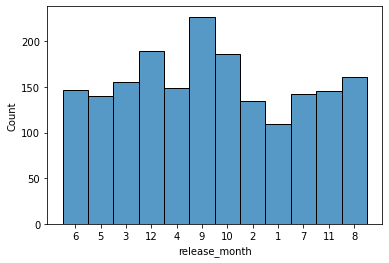

In [56]:
# Используем визуализацию по месяцу. Видим, что максимальное количесчтво фильмов приходится на 9-ый месяц.
sns.histplot(data['release_month'])

ВАРИАНТ 3

In [57]:
# Можно использовать метод dt.month(name), если бы мы не создали отдельную колонку с месяцем в предобработке.
data_21 = data.copy()
data_21['release_date'] = pd.Series(data_21['release_date']).dt.month_name()
data_21.groupby(['release_date'])['imdb_id'].nunique().sort_values(ascending=False).index[0]

'September'

In [58]:
answers['21'] = '9' #+

# 22. Сколько суммарно вышло фильмов летом? (за июнь, июль, август)

ВАРИАНТ 1

In [59]:
# Создаем в предобработке новую колонку release_monyth. Применяем метод группировки по месяцу, выводя кол-во уникальных фильмов.
# Суммируем количество фильмов для 6, 7, 8 месяцев, использую метод .loc.
data_22 = data.groupby(['release_month'])['imdb_id'].nunique()
data_22.loc['6']+data_22.loc['7']+data_22.loc['8']

450

ВАРИАНТ 2

In [60]:
# Фильтруем data по месяцам, использую функцию month. Находим длинну отфильтрованного датафрейма.
len(data[data.release_date.dt.month.isin([6, 7, 8])])

450

In [61]:
answers['22'] = 450 #+

# 23. Для какого режиссера зима – самое продуктивное время года? 

ВАРИАНТ 1

In [62]:
# Зима - декабрь, январь, февраль (12, 1, 2)
# Используем метод explode для преобразования списка режисссеров.
# Создаем pivot_table для месяца выхода фильма 12, 1, 2 по колонке месяц выпуска, значения - число фильмов, строки - режессеры, 
# выводим суммарные значения для всех месяцев (margins = True), сортируем по значению All, выводим первую строку, содержащую имя
# режиссера.
data_23 = data.copy()
data_23 = data_explode(data_23, 'director', cnt = False)
data_23_pivot = data_23.loc[data_23['release_month'].isin(['12','1','2'])].pivot_table(columns = 'release_month', 
                                index = 'director', 
                                values = 'imdb_id', 
                                aggfunc = 'count', margins=True).sort_values(
                                                                by = 'All', ascending=False)
data_23_pivot.index[1]

'Peter Jackson'

ВАРИАНТ 2

In [63]:
# Аналогичный вариант, с разницей в фильтрации датафрема. Если бы не добавляли колонку месяца, а использовали .month
data_23_pivot_2 = data_23.loc[data_23.release_date.dt.month.isin([12, 1, 2])].pivot_table(columns = 'release_month', 
                                index = 'director', 
                                values = 'imdb_id', 
                                aggfunc = 'count', margins=True).sort_values(
                                                                by = 'All', ascending=False)
data_23_pivot_2.index[1]

'Peter Jackson'

In [64]:
answers['23'] = 'Peter Jackson' #+

# 24. Какая студия дает самые длинные названия своим фильмам по количеству символов?

In [65]:
# В предобработке добавили колонку original_title_len. Расширили Data Frame, по колонке студии с помощью фукнкции data_explode.
# В полученном DF сгруппировали данные по студиям и длинне названия, использовав функции среднего. Отсортировали значения по убыванию,
# вывели нулевой элемент.
data_24 = data.copy()
data_24 = data_explode(data_24, 'production_companies', cnt = False)
data_24.groupby(['production_companies'])['original_title_len'].mean().sort_values(ascending=False).index[0]

'Four By Two Productions'

In [66]:
answers['24'] = 'Four By Two Productions' #+

# 25. Описание фильмов какой студии в среднем самые длинные по количеству слов?

In [67]:
# В предобработке добавили колонку overview_words_len. Расширили Data Frame, по колонке студии с помощью фукнкции data_explode.
# В полученном DF сгруппировали данные по студиям и длинне описаний, использовав функции среднего. Отсортировали значения по убыванию,
# вывели нулевой элемент.
data_25 = data.copy()
data_25 = data_explode(data_25, 'production_companies', cnt = False)

In [68]:
data_25.groupby(['production_companies'])['overview_words_len'].mean().sort_values(ascending=False).index[0]

'Midnight Picture Show'

In [69]:
answers['25'] = 'Midnight Picture Show' #+

# 26. Какие фильмы входят в 1 процент лучших по рейтингу? 
по vote_average

In [70]:
# Добавляем переменную quntile, которая показывает значение квантиля для рейтингов, выше 99%.
# Далее по данному значению фильруем dataframe data.
quantile = data.vote_average.quantile(q=0.99)
data[data.vote_average >= quantile].sort_values(by = 'vote_average', ascending=False)

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,profit,release_month,original_title_len,overview_words_len
599,tt0468569,185000000,1001921825,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,Why So Serious?,Batman raises the stakes in his war on crime. ...,152,Drama|Action|Crime|Thriller,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,2008-07-16,8.1,2008,816921825,7,15,67
9,tt2096673,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,Meet the little voices inside your head.,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,2015-06-09,8.0,2015,678708609,6,10,112
34,tt3170832,6000000,35401758,Room,Brie Larson|Jacob Tremblay|Joan Allen|Sean Bri...,Lenny Abrahamson,Love knows no boundaries,Jack is a young boy of 5 years old who has liv...,117,Drama|Thriller,Element Pictures|No Trace Camping|A24|Duperele...,2015-10-16,8.0,2015,29401758,10,4,49
118,tt0816692,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,Mankind was born on Earth. It was never meant ...,Interstellar chronicles the adventures of a gr...,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,2014-11-05,8.0,2014,456752480,11,12,35
125,tt2084970,14000000,233555708,The Imitation Game,Benedict Cumberbatch|Keira Knightley|Matthew G...,Morten Tyldum,The true enigma was the man who cracked the code.,Based on the real life story of legendary cryp...,113,History|Drama|Thriller|War,Black Bear Pictures|Bristol Automotive,2014-11-14,8.0,2014,219555708,11,18,46
370,tt1375666,160000000,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,Christopher Nolan,Your mind is the scene of the crime.,"Cobb, a skilled thief who commits corporate es...",148,Action|Thriller|Science Fiction|Mystery|Adventure,Legendary Pictures|Warner Bros.|Syncopy,2010-07-14,7.9,2010,665500000,7,9,44
1191,tt2024544,20000000,187000000,12 Years a Slave,Chiwetel Ejiofor|Michael Fassbender|Lupita Nyo...,Steve McQueen,The extraordinary true story of Solomon Northup,"In the pre-Civil War United States, Solomon No...",134,Drama|History,Plan B Entertainment|Regency Enterprises|River...,2013-10-18,7.9,2013,167000000,10,16,61
1183,tt0993846,100000000,392000694,The Wolf of Wall Street,Leonardo DiCaprio|Jonah Hill|Margot Robbie|Kyl...,Martin Scorsese,EARN. SPEND. PARTY.,A New York stockbroker refuses to cooperate in...,180,Crime|Drama|Comedy,Paramount Pictures|Appian Way|EMJAG Production...,2013-12-25,7.9,2013,292000694,12,23,29
1081,tt0167260,94000000,1118888979,The Lord of the Rings: The Return of the King,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,Peter Jackson,The eye of the enemy is moving.,Aragorn is revealed as the heir to the ancient...,201,Adventure|Fantasy|Action,WingNut Films|New Line Cinema,2003-12-01,7.9,2003,1024888979,12,45,45
872,tt0253474,35000000,120072577,The Pianist,Adrien Brody|Thomas Kretschmann|Frank Finlay|M...,Roman Polanski,Music was his passion. Survival was his master...,The Pianist is a film adapted from the biograp...,150,Drama|War,Bac Films|Canal+Polska|Heritage Films|Studio B...,2002-09-24,7.9,2002,85072577,9,11,39


In [71]:
answers['26'] = 'Inside Out, The Dark Knight, 12 Years a Slave' #+

# 27. Какие актеры чаще всего снимаются в одном фильме вместе?


In [90]:
# Задаем переменную pairs, которой назначаем словарь из модуля collections - couner, 
# который позволяет нам считать количество неизменяемых объектов
pairs = collections.Counter()

In [73]:
# Создаем копию изначального dataframe
data_27 = data.copy()

In [74]:
# Конвертируем значение всех данных в колонке актеров в списки актёров
data_27['cast'] = data_27['cast'].str.split('|')

In [89]:
# Цикл, проходящий по всему DataFrame от 0 до конца data
for i in range(0,len(data)):
    # Переменной actors присыаиваем список актеров строки
    actors = data_27.cast[i]
    # Из модуля itertools используем combinations, который находит комбинации длиной 2 из списка актёров
    # без повторяющихся элементов.
    for pairs_actor in list(combinations(actors, 2)):
        # если пара найденных актёров в словаре отсутсвует, то создаем значение в словаре и присваиваем счётчик "1"
        pairs_actor_reverted = []
        pairs_actor_reverted.append(pairs_actor[1]) 
        pairs_actor_reverted.append(pairs_actor[0])
        if pairs_actor not in pairs:
            if tuple(pairs_actor_reverted) not in pairs:
                pairs[pairs_actor] = 1
            else:
                pairs[tuple(pairs_actor_reverted)] += 1
        # если пара актёров ранее уже встречалась, то увеличиваем счетчик на единицу.
        else:
            pairs[pairs_actor] += 1

# Из словаря выводим три наиболее встречающихся комбинаций актёров.
pairs.most_common(10)

[(('Daniel Radcliffe', 'Rupert Grint'), 8),
 (('Daniel Radcliffe', 'Emma Watson'), 8),
 (('Rupert Grint', 'Emma Watson'), 8),
 (('Ben Stiller', 'Owen Wilson'), 6),
 (('Johnny Depp', 'Helena Bonham Carter'), 6),
 (('Vin Diesel', 'Paul Walker'), 5),
 (('Adam Sandler', 'Kevin James'), 5),
 (('Hugh Jackman', 'Ian McKellen'), 5),
 (('Kristen Stewart', 'Robert Pattinson'), 5),
 (('Kristen Stewart', 'Taylor Lautner'), 5)]

In [91]:
# Цикл, проходящий по всему DataFrame от 0 до конца data
for i in range(0,len(data)):
    # Переменной actors присыаиваем список актеров строки
    actors = data_27.cast[i]
    # Из модуля itertools используем combinations, который находит комбинации длиной 2 из списка актёров
    # без повторяющихся элементов.
    for pairs_actor in list(combinations(actors, 2)):
        # если пара найденных актёров в словаре отсутсвует, то создаем значение в словаре и присваиваем счётчик "1"
        if pairs_actor not in pairs:
            pairs[pairs_actor] = 1
        # если пара актёров ранее уже встречалась, то увеличиваем счетчик на единицу.
        else:
            pairs[pairs_actor] += 1

# Из словаря выводим три наиболее встречающихся комбинаций актёров.
pairs.most_common(3)

[(('Daniel Radcliffe', 'Rupert Grint'), 8),
 (('Daniel Radcliffe', 'Emma Watson'), 8),
 (('Rupert Grint', 'Emma Watson'), 7)]

In [ ]:
answers['27'] = 'Daniel Radcliffe', 'Rupert Grint' #+

# Submission

In [ ]:
# В конце можно посмотреть свои ответы к каждому вопросу
answers

In [ ]:
# и убедиться что ни чего не пропустил)
len(answers)